<a href="https://colab.research.google.com/github/pro-trice8/carprice_prediction_model/blob/main/car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [17]:
df = pd.read_csv("/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [24]:
print(df["Fuel_Type"].value_counts())
print(f'\n{df["Seller_Type"].value_counts()}')
print(f'\n{df["Transmission"].value_counts()}')

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [26]:
df.replace({"Fuel_Type" : {"Petrol":0, "Diesel":1, "CNG":2}}, inplace = True)
df.replace({"Seller_Type" : {"Dealer":0, "Individual":1}}, inplace = True)
df.replace({"Transmission" : {"Manual":0, "Automatic":1}}, inplace = True)

<ipython-input-26-ed047cdd6081>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Seller_Type" : {"Dealer":0, "Individual":1}}, inplace = True)
<ipython-input-26-ed047cdd6081>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Transmission" : {"Manual":0, "Automatic":1}}, inplace = True)


In [27]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [28]:
cars_df = df.copy()

In [30]:
#Splitting the dataset into train and test
x = cars_df.drop(["Car_Name", "Selling_Price"], axis = 1)
y = cars_df["Selling_Price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [40]:
train_predict = lr_model.predict(x_train)
print(f"{train_predict} \n")
r2_square = metrics.r2_score(y_train, train_predict)
print("R2 score: ", r2_square)

[ 8.89356190e+00 -8.39313063e-01  1.89505944e+00  8.42555143e+00
  4.40250198e+00  7.12205942e+00  7.28796644e+00  2.72520231e+00
  7.73834276e+00  3.43921639e+00  3.74038544e+00  4.24217137e+00
  6.21084124e-01  7.12850075e+00  4.51224776e-01  7.25746003e+00
  1.11041272e+01  2.98000114e+00  4.99965721e+00  6.72094200e+00
  2.36499870e+00  2.06886481e+01  1.70770592e+01  7.29562814e+00
  9.80643142e+00  4.43292181e+00  8.83750748e+00  1.33140317e+00
  7.67526265e+00  1.92729742e-01 -2.53287823e+00  2.14131525e+00
 -1.86625051e+00  4.71297230e+00  1.94438279e+00  2.03226054e+01
  1.83925709e+01  5.40038839e+00 -8.12829162e-01  4.64968411e+00
  5.21590044e+00  5.64607757e+00  4.88965397e+00  2.54143686e+00
  1.73265953e+00  2.08360693e+00  1.00367506e+01  8.55764441e-01
  7.77899345e+00  4.45673317e+00  3.11922106e+00  4.16108689e+00
  1.45153600e+01  2.02144315e+00  3.25710808e+00  9.27381883e-01
  3.17268609e+00  1.23433163e+00  1.68665336e+01  1.47388429e+00
  3.07641074e-02  8.94373

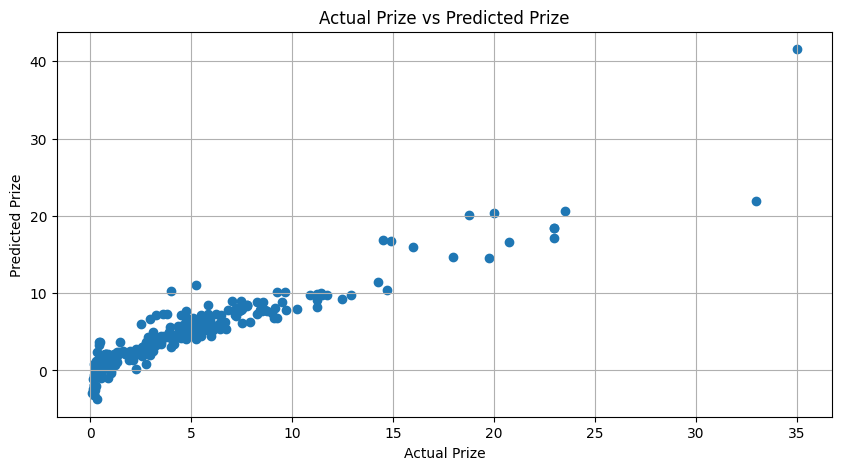

In [39]:
plt.figure(figsize=(10,5))
plt.scatter(y_train, train_predict)
plt.xlabel("Actual Prize")
plt.ylabel("Predicted Prize")
plt.title("Actual Prize vs Predicted Prize")
plt.grid()
plt.show()

In [43]:
test_predict = lr_model.predict(x_test)
print(f"{test_predict} \n")
r2_square = metrics.r2_score(y_test, test_predict)
print("R2 score: ", r2_square)

[ 3.12014646  8.25233281  6.09135926 -1.45602499  9.04591939  7.20705063
  1.41640397  0.86885909  1.49050471  7.2365271   9.07565017  0.5629711
  8.41576881  3.6432358   6.59152277  2.88633915  0.41843056 10.87640735
  1.92935588  2.5353782   0.37331985  7.96789412  6.26813041  2.40577882
  0.80841342  3.50189479  5.12837742  2.57390607  2.32093045  1.88498645
  0.37271223] 

R2 score:  0.8311069476244144


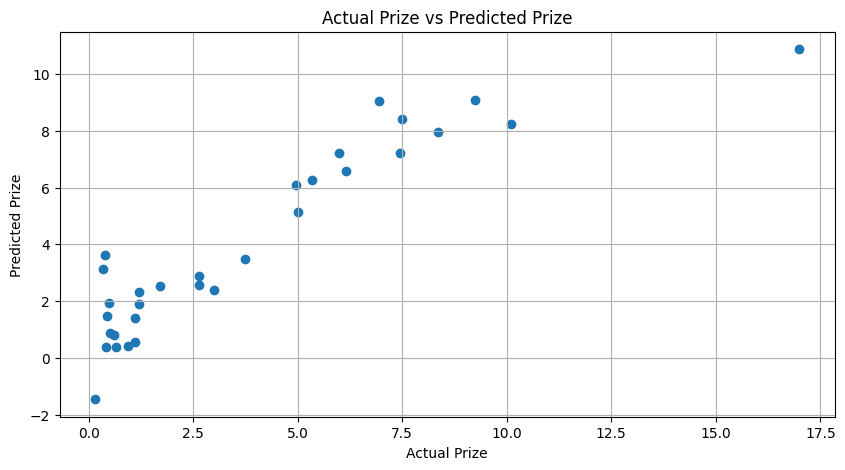

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, test_predict)
plt.xlabel("Actual Prize")
plt.ylabel("Predicted Prize")
plt.title("Actual Prize vs Predicted Prize")
plt.grid()
plt.show()

R2 score:  0.8436909482009372


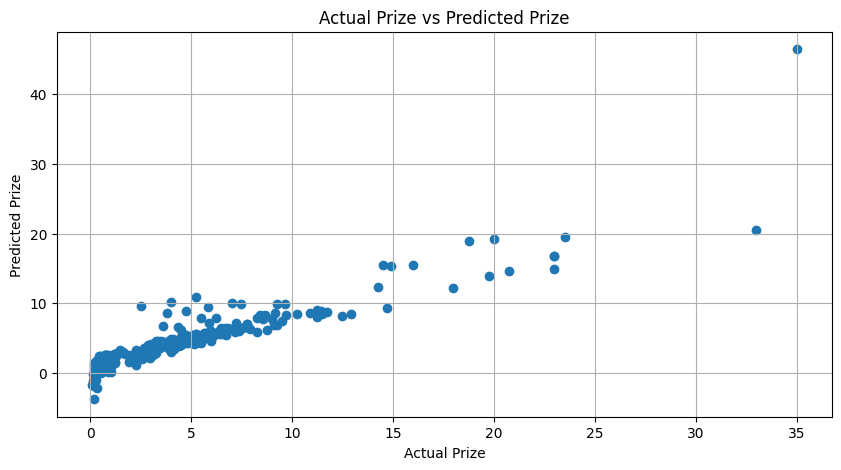

In [50]:
#Lasso Regression Model
lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

train_predict_lasso = lasso_model.predict(x_train)
r2_square_lasso = metrics.r2_score(y_train, train_predict_lasso)
print("R2 score: ", r2_square_lasso)

plt.figure(figsize=(10,5))
plt.scatter(y_train, train_predict_lasso)
plt.xlabel("Actual Prize")
plt.ylabel("Predicted Prize")
plt.title("Actual Prize vs Predicted Prize")
plt.grid()
plt.show()

R2 score:  0.839226320049874


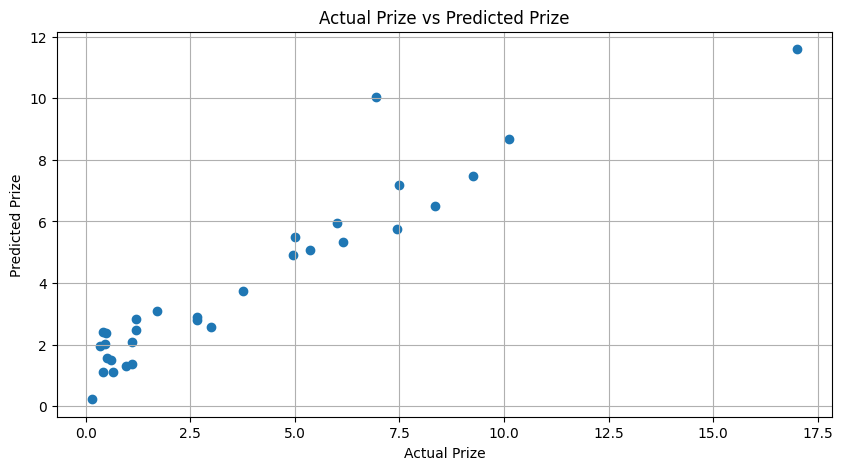

In [51]:
test_predict_lasso = lasso_model.predict(x_test)
r2_square_lasso = metrics.r2_score(y_test, test_predict_lasso)
print("R2 score: ", r2_square_lasso)

plt.figure(figsize=(10,5))
plt.scatter(y_test, test_predict_lasso)
plt.xlabel("Actual Prize")
plt.ylabel("Predicted Prize")
plt.title("Actual Prize vs Predicted Prize")
plt.grid()
plt.show()